Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


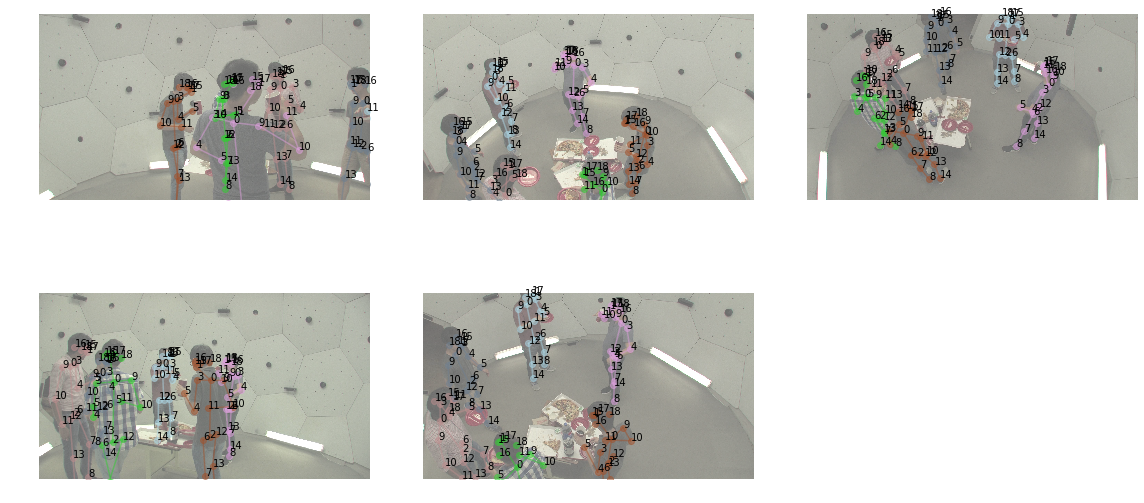

In [1]:
%matplotlib inline

import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from cselect import color as cs
import sys
sys.path.insert(0,'../')
sys.path.insert(0,'../samples')
sys.path.insert(0,'../debugging')
from mvpose.data import epfl_campus
from time import time

root = Settings['CMU']['data_root']
tmp = Settings['tmp']

import mvpose.data.kth_football2 as kth
from mvpose import pose
from mvpose.settings import get_settings
from paf_loader import Loader
from mvpose.evaluation import pcp

import mvpose.data.kth_football2 as kth
from mvpose import pose
from mvpose.settings import get_settings
from paf_loader import Loader
from mvpose.evaluation import pcp
from mvpose.plot.limbs import draw_mscoco_human, draw_mscoco_human2d
from mvpose.data import cmu_panoptic
from cselect import color as cs
from random import shuffle


from openpose import OpenPose

pe = OpenPose(tmp=tmp)


FRAME = 1400

nodes = [0, 1, 2, 3, 4]
panels = [0, 0, 0, 0, 0]
# seq_name = '160224_haggling1'
# seq_name = '160422_ultimatum1'
seq_name = '160906_pizza1'

# valid_frames = list(range(300, 3758))  # ULTIMATUM
valid_frames = list(range(1000, 4458))  # PIZZA
# valid_frames = list(range(4209, 5315)) + list(range(6440, 8200))  # HAGGLING

Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=FRAME)

fig = plt.figure(figsize=(16,8))

# Edges between joints in the body skeleton
body_edges = np.array([[1,2],[1,4],[4,5],[5,6],[1,3],[3,7],[7,8],[8,9],[3,13],[13,14],[14,15],[1,10],[10,11],[11,12]])-1


colors = ['red', 'blue', 'yellow', 'cyan', 'orange', 
          'teal', 'white', 'cornflowerblue', 'limegreen',
         'rosybrown', 'sienna', 'plum', 'slategrey',
         'orchid', 'lightblue', 'azure', 'aliceblue',
         'darkblue', 'lightcoral', 'silver', 'mediumpurple',
         'lightskyblue']
shuffle(colors)

# n = 18
# colors = cs.rangecolor(n, (255, 0, 0), (0, 256, 0))/255

for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(2,3,1+idx)
    ax.axis('off')
    im = Im[idx]
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.6)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
#     ax.set_xlim([1200, 1800])
#     ax.set_ylim([1080, 300])
    
    for pid, points3d_weighted in Y:
        pts3d = points3d_weighted[:, 0:3].astype('float32')
        pts2d = cam.projectPoints(pts3d)
        pts2dT = pts2d.transpose()
        ax.scatter(pts2d[:, 0], pts2d[:, 1], color=colors[pid], alpha=0.5)
        for edge in body_edges:
            ax.plot(pts2dT[0, edge], pts2dT[1, edge],
                    color=colors[pid], alpha=0.5)
        for idx, (x, y) in enumerate(pts2d):
            if x >= 0 and x < w:
                if y >= 0 and y < h:
                    ax.text(x, y, str(idx))
        
    
plt.tight_layout()

plt.show()

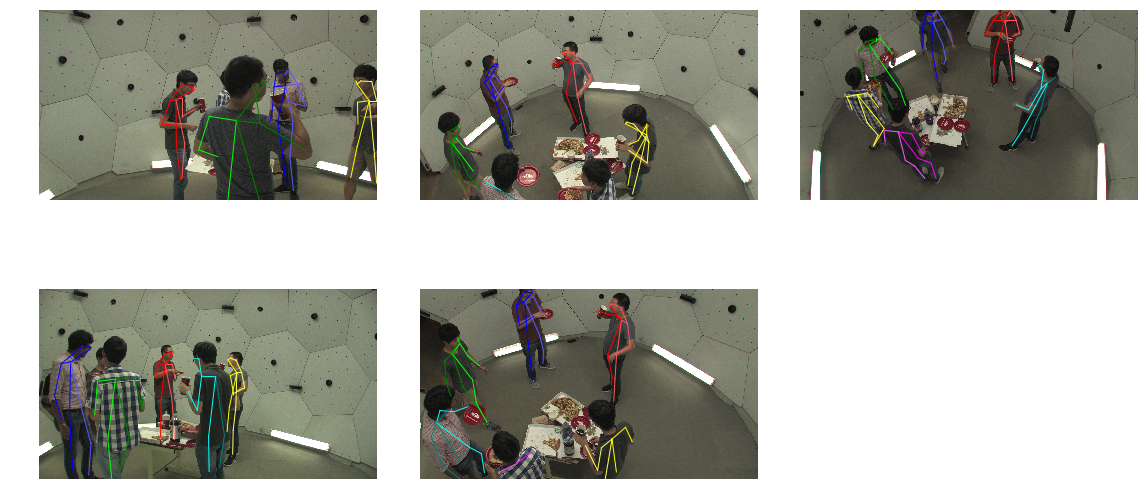

In [2]:
predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, FRAME)

colors = ['red', 'blue', 'green', 'yellow', 'teal', 'magenta']

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 8))
for idx, (im, pred) in enumerate(zip(Im, predictions)):
    ax = fig.add_subplot(2, 3, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(pred):
        draw_mscoco_human2d(ax, human[:, 0:2], color=colors[pid])

    
plt.tight_layout()
plt.show()

In [3]:
# valid_frames = list(range(300, 3166))
# for frame in valid_frames:
#     if frame % 10 == 0:
#         print('frame', frame)
#     Im, Y, calib = cmu_panoptic.get(root, seq_name, 
#                                     panels, nodes, frame=frame,
#                                     ignore_videos=True)
#     predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, frame)

In [4]:
# valid_frames = list(range(300, 3166))
# valid_frames = list(range(300, 400))


Calib = []
poses_per_frame = []
poses_per_frame_lookup = {}
Pos3d = {}

_start = time()
for frame in valid_frames:
    if frame % 10 == 0:
        print('frame', frame)
    Im, Y, calib = cmu_panoptic.get(root, seq_name, 
                                    panels, nodes, frame=frame,
                                    ignore_videos=True)
#     Calib.append(calib)
    Pos3d[frame] = Y
    predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, frame)
    poses_per_frame.append(predictions)
    poses_per_frame_lookup[frame] = predictions
_end = time()
Calib = calib
print('elapsed', _end - _start)

frame 1000
frame 1010
frame 1020
frame 1030
frame 1040
frame 1050
frame 1060
frame 1070
frame 1080
frame 1090
frame 1100
frame 1110
frame 1120
frame 1130
frame 1140
frame 1150
frame 1160
frame 1170
frame 1180
frame 1190
frame 1200
frame 1210
frame 1220
frame 1230
frame 1240
frame 1250
frame 1260
frame 1270
frame 1280
frame 1290
frame 1300
frame 1310
frame 1320
frame 1330
frame 1340
frame 1350
frame 1360
frame 1370
frame 1380
frame 1390
frame 1400
frame 1410
frame 1420
frame 1430
frame 1440
frame 1450
frame 1460
frame 1470
frame 1480
frame 1490
frame 1500
frame 1510
frame 1520
frame 1530
frame 1540
frame 1550
frame 1560
frame 1570
frame 1580
frame 1590
frame 1600
frame 1610
frame 1620
frame 1630
frame 1640
frame 1650
frame 1660
frame 1670
frame 1680
frame 1690
frame 1700
frame 1710
frame 1720
frame 1730
frame 1740
frame 1750
frame 1760
frame 1770
frame 1780
frame 1790
frame 1800
frame 1810
frame 1820
frame 1830
frame 1840
frame 1850
frame 1860
frame 1870
frame 1880
frame 1890
frame 1900

In [5]:
from mvpose.baseline.tracking import tracking, Track

_start = time()
tracks = tracking(Calib, poses_per_frame,
                  epi_threshold=80,
                  scale_to_mm=10,
                  max_distance_between_tracks=200,
                  actual_frames=valid_frames,
                  min_track_length=4,
                  merge_distance=150,
                  z_axis=1,
                  last_seen_delay=5)
_end = time()
print('elapsed', _end - _start)
print("#tracks", len(tracks))
print('')
for track in tracks:
    print('\ttrack length:', len(track))

elapsed 398.89997005462646
#tracks 117

	track length: 891
	track length: 205
	track length: 70
	track length: 611
	track length: 559
	track length: 23
	track length: 11
	track length: 71
	track length: 8
	track length: 16
	track length: 8
	track length: 653
	track length: 11
	track length: 9
	track length: 106
	track length: 4
	track length: 12
	track length: 73
	track length: 4
	track length: 1369
	track length: 4
	track length: 132
	track length: 4
	track length: 5
	track length: 5
	track length: 56
	track length: 9
	track length: 191
	track length: 4
	track length: 878
	track length: 13
	track length: 32
	track length: 17
	track length: 6
	track length: 5
	track length: 26
	track length: 5
	track length: 4
	track length: 10
	track length: 110
	track length: 5
	track length: 15
	track length: 27
	track length: 1258
	track length: 189
	track length: 4
	track length: 41
	track length: 26
	track length: 5
	track length: 98
	track length: 22
	track length: 33
	track length: 5
	track len

In [6]:
is_smoothing = True
if is_smoothing:
    _start = time()
    tracks_ = []
    for track in tracks:
        track = Track.smoothing(track, 
                                sigma=1.7,
                                interpolation_range=20)
        tracks_.append(track)
    tracks = tracks_
    _end = time()
    print("elapsed", _end - _start)

elapsed 1.6859254837036133


In [7]:
def calculate_pcp_score(Y, detections):
    alpha = 0.2
    Humans = kth.transform3d_from_mscoco(detections)
    L_Arms = []
    U_Arms = []
    L_Legs = []
    U_Legs = []
    GTIDs = []
    
    Y_kth = []
    for _, gt in Y:
        Y_kth.append(gt[:, 0:3])
    Y_kth = kth.transform3d_from_mscoco(Y_kth)
        
    for gtid, gt in enumerate(Y_kth):
        if gt is None:
            continue
        
        larms = 0
        uarms = 0
        llegs = 0
        ulegs = 0
        avg = 0
        for d in Humans:
            r = pcp.evaluate(gt, d, alpha)
            larms_ = r.lower_arms
            uarms_ = r.upper_arms
            ulegs_ = r.upper_legs
            llegs_ = r.lower_legs
            avg_ = (larms_ + uarms_ + ulegs_ + llegs_) / 4
            if avg_ > avg:
                avg = avg_
                larms = larms_
                uarms = uarms_
                llegs = llegs_
                ulegs = ulegs_
        
        L_Arms.append(larms)
        U_Arms.append(uarms)
        L_Legs.append(llegs)
        U_Legs.append(ulegs)
        GTIDs.append(gtid)
    
    return L_Arms, U_Arms, L_Legs, U_Legs, GTIDs

In [8]:
PER_GTID = {}
for idx, frame in enumerate(valid_frames):
    Humans = []
    for track in tracks:
        pose = track.get_by_frame(frame)
        if pose is not None:
            Humans.append(pose)
    
    Y = Pos3d[frame]
    Y = cmu_panoptic.transform_y(Y)
    L_Arms, U_Arms, L_Legs, U_Legs, GTIDs = calculate_pcp_score(Y, Humans)
    if len(L_Arms) > 0:
        for gtid, larms, uarms, llegs, ulegs in zip(
            GTIDs, L_Arms, U_Arms, L_Legs, U_Legs
        ):
            if not gtid in PER_GTID:
                PER_GTID[gtid] = {
                    'larms': [],
                    'uarms': [],
                    'llegs': [],
                    'ulegs': [],
                    'frame': []
                }
            PER_GTID[gtid]['larms'].append(larms)
            PER_GTID[gtid]['uarms'].append(uarms)
            PER_GTID[gtid]['llegs'].append(llegs)
            PER_GTID[gtid]['ulegs'].append(ulegs)
            PER_GTID[gtid]['frame'].append(frame)

In [9]:
total_avg = []
for key, values in PER_GTID.items():
    print('actor ', key)
    print('\tuarms:', np.mean(values['uarms']))
    print('\tlarms:', np.mean(values['larms']))
    print('\tulegs:', np.mean(values['ulegs']))
    print('\tllegs:', np.mean(values['llegs']))
    avg = np.mean([
        np.mean(values['uarms']),
        np.mean(values['larms']),
        np.mean(values['ulegs']),
        np.mean(values['llegs'])
    ])
    total_avg.append(avg)
    print('\tavg:  ', avg)
print('\navg*:  ', np.mean(total_avg))

actor  0
	uarms: 0.8123192596876807
	larms: 0.7572296124927704
	ulegs: 0.9161364950838635
	llegs: 0.7478311162521689
	avg:   0.8083791208791209
actor  1
	uarms: 0.6886928860613071
	larms: 0.5702718334297282
	ulegs: 0.6030942741469058
	llegs: 0.4927703875072296
	avg:   0.5887073452862926
actor  2
	uarms: 0.8309716599190283
	larms: 0.7741469057258531
	ulegs: 0.9258241758241759
	llegs: 0.7952573742047426
	avg:   0.83155002891845
actor  3
	uarms: 0.6891266628108733
	larms: 0.36871023713128975
	ulegs: 0.3924233661075766
	llegs: 0.1362058993637941
	avg:   0.3966165413533834
actor  4
	uarms: 0.847165991902834
	larms: 0.5456911509543089
	ulegs: 0.7121168305378832
	llegs: 0.5548004626951996
	avg:   0.6649436090225564
actor  5
	uarms: 0.9158763610818406
	larms: 0.8041798384264137
	ulegs: 0.6791359325605901
	llegs: 0.47348085704250087
	avg:   0.7181682472778363

avg*:   0.6680608154562733


In [10]:
# ====================================
# HAGGLING (UNSMOOTHED)
# actor  0
# 	uarms: 0.9516200621393698
# 	larms: 0.8863737239236573
# 	ulegs: 0.9511762094984465
# 	llegs: 0.8914780292942743
# 	avg:   0.920162006213937
# actor  1
# 	uarms: 0.9887073522345027
# 	larms: 0.9281595386833253
# 	ulegs: 0.9839019702066314
# 	llegs: 0.9178279673234022
# 	avg:   0.9546492071119654
# actor  2
# 	uarms: 0.9553274139844617
# 	larms: 0.8817980022197558
# 	ulegs: 0.943118756936737
# 	llegs: 0.7622086570477248
# 	avg:   0.8856132075471699

# avg*:   0.9201414736243575

# # -- PCP 0.2
# actor  0
# 	uarms: 0.848202396804261
# 	larms: 0.7933865956502442
# 	ulegs: 0.8011540168664003
# 	llegs: 0.70994229915668
# 	avg:   0.7881713271193964
# actor  1
# 	uarms: 0.9500240269101393
# 	larms: 0.871456030754445
# 	ulegs: 0.9298414223930802
# 	llegs: 0.7847188851513696
# 	avg:   0.8840100913022586
# actor  2
# 	uarms: 0.8562708102108768
# 	larms: 0.7597114317425083
# 	ulegs: 0.8321309655937846
# 	llegs: 0.6220865704772475
# 	avg:   0.7675499445061044

# avg*:   0.8132437876425865


# =====================================
# PIZZA (UNSMOOTHED)
# actor  0
# 	uarms: 0.9412072575017446
# 	larms: 0.8923586880669924
# 	ulegs: 0.9678995115143056
# 	llegs: 0.958827634333566
# 	avg:   0.9400732728541522
# actor  1
# 	uarms: 0.8647941381716678
# 	larms: 0.7269713886950454
# 	ulegs: 0.6994068387997209
# 	llegs: 0.5437892533147244
# 	avg:   0.7087404047452897
# actor  2
# 	uarms: 0.9408583391486393
# 	larms: 0.8878227494766224
# 	ulegs: 0.9473133286810886
# 	llegs: 0.927599441730635
# 	avg:   0.9258984647592463
# actor  3
# 	uarms: 0.6755059316120028
# 	larms: 0.28960223307745986
# 	ulegs: 0.5003489183531054
# 	llegs: 0.1388695045359386
# 	avg:   0.40108164689462666
# actor  4
# 	uarms: 0.9085833914863922
# 	larms: 0.5854849965108164
# 	ulegs: 0.6899860432658758
# 	llegs: 0.31629448709002095
# 	avg:   0.6250872295882763
# actor  5
# 	uarms: 0.9416851441241685
# 	larms: 0.9002217294900222
# 	ulegs: 0.9186252771618625
# 	llegs: 0.6039911308203991
# 	avg:   0.841130820399113

# avg*:   0.7403353065401174

# =====================================
# ULTIMATUM (smoothing)
# actor  0
# 	uarms: 0.9813065722156631
# 	larms: 0.9771743408107044
# 	ulegs: 0.9563164108618654
# 	llegs: 0.9496261314443133
# 	avg:   0.9661058638331366
# actor  1
# 	uarms: 0.9419035846724351
# 	larms: 0.7634940255459415
# 	ulegs: 0.5449114132674083
# 	llegs: 0.4177997527812114
# 	avg:   0.6670271940667492
# actor  2
# 	uarms: 0.9731332868108863
# 	larms: 0.9734822051639916
# 	ulegs: 0.9741800418702024
# 	llegs: 0.9741800418702024
# 	avg:   0.9737438939288207

# avg*:   0.868958983942902

### debugging

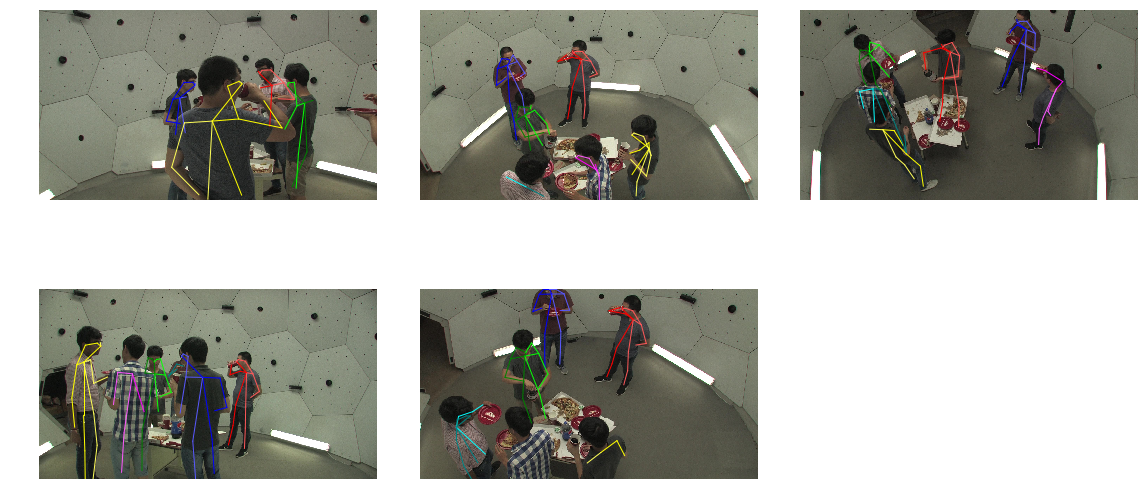

In [11]:
FRAME = 1500
predictions = poses_per_frame_lookup[FRAME]
Im, Y, calib = cmu_panoptic.get(root, seq_name, 
                                    panels, nodes, frame=FRAME)

colors = ['red', 'blue', 'green', 'yellow', 'teal', 'magenta']

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 8))
for idx, (im, pred) in enumerate(zip(Im, predictions)):
    ax = fig.add_subplot(2, 3, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(pred):
        draw_mscoco_human2d(ax, human[:, 0:2], color=colors[pid])

    
plt.tight_layout()
plt.show()

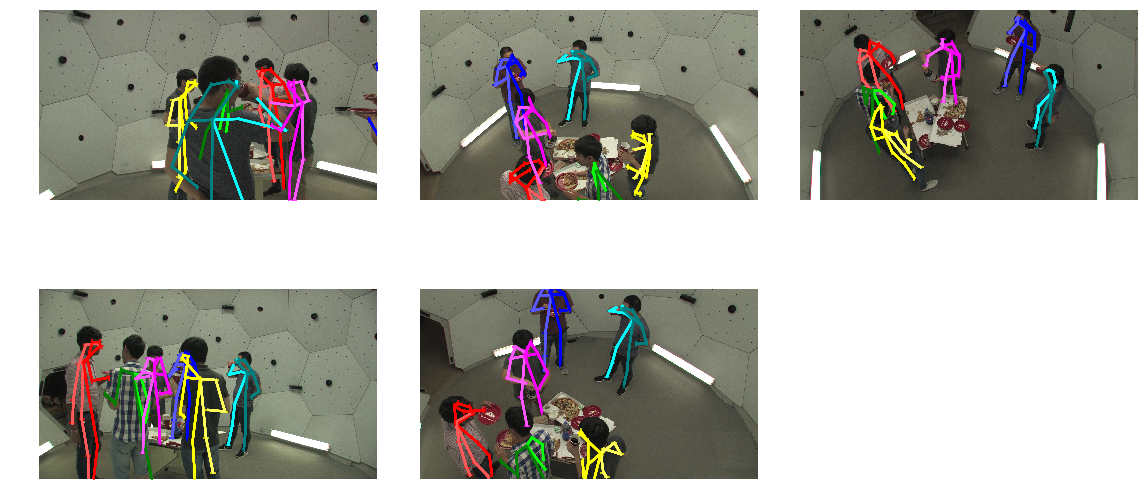

In [12]:
Humans = []
for track in tracks:
    pose = track.get_by_frame(FRAME)
    if pose is not None:
        Humans.append(pose)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 8))
for idx, (im, cam) in enumerate(zip(Im, Calib)):
    ax = fig.add_subplot(2, 3, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(Humans):
        draw_mscoco_human(ax, human, cam, 
                          color=colors[pid], linewidth=2)

    
plt.tight_layout()
plt.show()

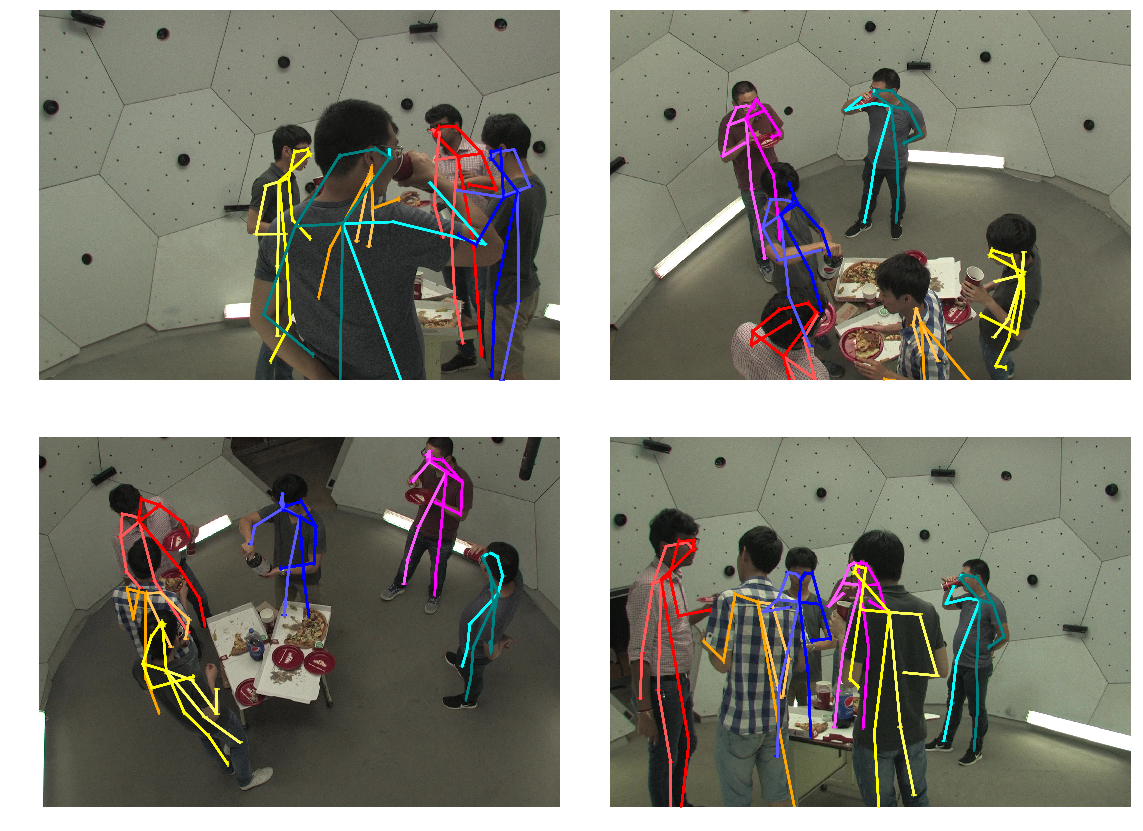

In [13]:
colors = ['red', 'blue', 'green', 'yellow', 'teal', 'magenta']
colors = ['red', 'magenta', 'orange', 'yellow', 'teal', 'blue']

Humans = []
for track in tracks:
    pose = track.get_by_frame(FRAME)
    if pose is not None:
        Humans.append(pose)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 12))
for idx, (im, cam) in enumerate(zip(Im[0:4], Calib[0:4])):
    ax = fig.add_subplot(2, 2, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([100, 1620])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(Humans):
        draw_mscoco_human(ax, human, cam, 
                          color=colors[pid], linewidth=2)

    
plt.tight_layout()
plt.show()

In [14]:
# from mvpose.plot.limbs import draw_mscoco_human3d
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(111, projection='3d')

# human = Humans[0]
# vmin = np.min(human)
# vmax = np.max(human)

# ax.set_xlim([vmin, vmax])
# ax.set_ylim([vmin, vmax])
# ax.set_zlim([vmin, vmax])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# draw_mscoco_human3d(ax, human, 'red')

# plt.show()

## MOTA

https://github.com/cheind/py-motmetrics

In [24]:
import motmetrics as mm
from mvpose.baseline.baseline import distance_between_poses

acc = mm.MOTAccumulator(auto_id=True)
scale_to_mm = 10
MOTA_distance = 200  # [mm]

def cleanup(Humans):
    Result = []
    for human in Humans:
        remove = True
        for pt in human:
            if pt is not None:
                remove = False
                break
        if not remove:
            Result.append(human)
        
    return Result

possible_ids_lookup = {}
n_possible_ids = 0
for frame in valid_frames:
    Y = Pos3d[frame]
    Y = cmu_panoptic.transform_y(Y)
    
    Humans = []
    
    gtids = []
    trids = []
    
    for tid, track in enumerate(tracks):
        pose = track.get_by_frame(frame)
        if pose is not None:
            Humans.append(pose)
            trids.append(tid)
    Humans = cleanup(Humans)
    
    for pid, _ in Y:
        gtids.append(pid)
    
    n = len(gtids)
    m = len(trids)
    
    distances = np.empty((n, m))
    for i, gt in enumerate(Y):
        for j, pr in enumerate(Humans):
            
            try:
                d = distance_between_poses(gt[1][:,0:3], pr, z_axis=1)
            except:
                print("GT", gt)
                print("Pr", pr)
                raise
            
            d = d * scale_to_mm
            
            if d <= MOTA_distance:
                distances[i, j] = d
                
                # track possible identity switches
                if (frame, i) in possible_ids_lookup:
                    possible_ids_lookup[frame, i] += 1
                else:
                    possible_ids_lookup[frame, i] = 1
                
                if possible_ids_lookup[frame, i] == 2:
                    n_possible_ids += 1
                
            else:
                distances[i, j] = np.nan
    
    acc.update(gtids, trids, distances)
    
    
mh = mm.metrics.create()
summary = mh.compute(acc, 
                     metrics=['num_frames', 'mota', 'motp'], 
                     name='acc')

print(summary)

     num_frames      mota       motp
acc        3458  0.936634  45.065756


In [27]:
56/n_possible_ids

0.2557077625570776

In [23]:
summary = mh.compute(acc, 
                     metrics=mm.metrics.motchallenge_metrics, 
                     name='acc')

strsummary = mm.io.render_summary(
    summary, 
    formatters=mh.formatters, 
    namemap=mm.io.motchallenge_metric_names
)
print(strsummary)

     IDF1   IDP   IDR  Rcll  Prcn GT MT PT ML  FP  FN IDs  FM  MOTA   MOTP
acc 34.9% 34.6% 35.2% 97.8% 96.2%  7  7  0  0 782 438  56  62 93.7% 45.066


In [16]:
# HAGGLING (not smoothed)
#      num_frames     mota       motp
# acc        2328  0.92161  32.946946

# PIZZA (smoothed)
#    num_frames      mota       motp
# acc        2866  0.931444  45.519765

# not smoothed
#      num_frames     mota       motp
# acc        2866  0.92662  40.093258

# ULTIMATUM (default)

# num_frames      mota       motp
# acc        2553  0.877207  37.555424